# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [2]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [17]:
#1

Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
#2
A = np.array([[1, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 4, 0], [0, 0, 0, 0, 5]])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [10]:
#3
A = np.array([[1, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 4, 0], [0, 0, 0, 0, 5]])
tr = np.trace(A)
print(tr)

15


In [12]:
#4
A = np.array([[1, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 4, 0], [0, 0, 0, 0, 5]])
B = sla.inv(A)
print(B) 

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [27]:
#5
X = np.random.rand(4,5) 
print(X)

[[0.19051871 0.21438842 0.31691104 0.14787432 0.92769913]
 [0.880655   0.02952174 0.90556439 0.35795101 0.2851865 ]
 [0.52061617 0.7837987  0.95439986 0.46993024 0.34760469]
 [0.92579677 0.94718544 0.61386126 0.39857875 0.7816419 ]]


In [35]:
#6
print(sla.det(X[np.ix_([2,3],[1,2])]))

-0.42284998976698007


In [26]:
#7
print(X@(X.T))

[[2.33312859 2.00981371 1.19792651 1.98493971]
 [2.00981371 1.7875767  1.0323129  1.73310057]
 [1.19792651 1.0323129  0.84169361 0.67313124]
 [1.98493971 1.73310057 0.67313124 2.95862472]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [155]:
def my_det(X):
    a = X.shape
    det=0
    if a[0]!=a[1]:
        raise ValueError
    else:
        mul=1
        for k in range(len(X[0])):
            for j in range(k+1, len(X[0])):
                if X[k][k]!=0:
                    for h in range(len(X[0])):
                        X[k][h]*=X[j][k]
                        X[j][h]*=X[k][k]
                    mul*=X[k][k]
                    for i in range(k, len(X[0])):
                        X[j][i] -= X[k][i]
                else:
                    for h in range(len(X[0])):
                        X[k][h], X[j][h] = X[j][h], X[k][h]
                    mul*=-1
                    k+=1
        if mul!=0:
            det = np.diagonal(X).prod() *mul
        else:
            det = 0
    return  det

Простая проверка:

In [156]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [157]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

26.6 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
593 µs ± 4.52 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
109 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
557 ms ± 2.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.5 ms ± 506 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9min 13s ± 16.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


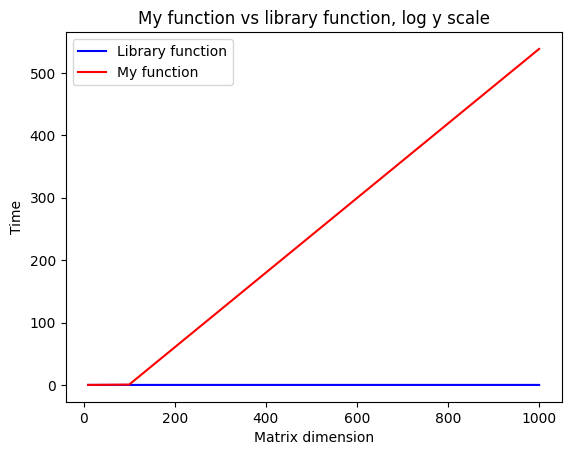

In [158]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

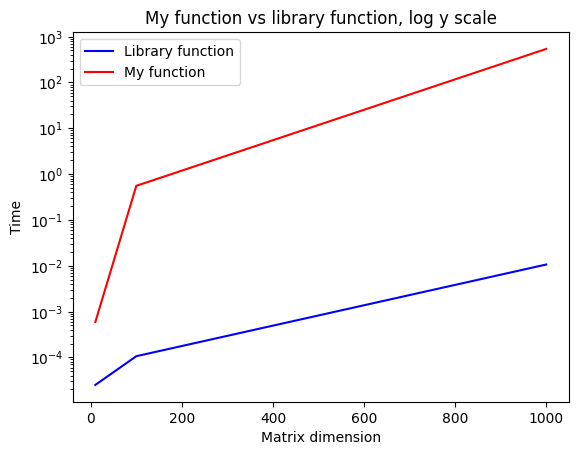

In [159]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [93]:
# 1
A = np.array([[1, 0], [10**20, 1]])
B = np.array([[10**(-20), 1], [0, 1-10**20]])
print(A@B)

[[1e-20 1]
 [1.0 1]]


In [95]:
#2
A = np.array([[1., 0.], [10**20., 1.]])
B = np.array([[10**(-20), 1.], [0., 1-10**20]])
print(A@B)

[[1e-20 1.0]
 [1.0 0.0]]


И какой из них правильный?

---
**Верен целочисленный вариант.**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [105]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    for k in range(dim):
        P[0][k] = 1
    for i in range(dim):
        for j in range(dim):
            P[i][j] = P[i-1][j]+P[i][j-1]
    return P

P = my_pascal(4)
print(P)

[[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]


Чему равен её определитель? **Строго** поясните свой ответ.

----
**Определитель матрицы Паскаля равен 1, найдем его через элементарные преобразования. Заметим, что $P_{i,j} = C^i_{i+j} = C^{i-1}_{i+j-1} + C^{i}_{i+j-1} = P_{i-1, j} +P_{i, j-1}$, тогда, начиная с n строки $-P_{i}+P{i-1}$ = {0, строка i без последнего элемента }, получим первый столбец, состоящий из 0 в n-1 строке с 1 первой, остальные стобцы и строки образуют матрицу Паскаля, поворим элементраные преобразования с n строки, получим во втором столбце нули в строках с 3 до n, в первых двух строках будут единицы, повторяя действия дальше, придем к тому, что мы получим верхнетреугольную матрицу Паскаля, тогда определитель верхнетреугольной матрицы $det(P^*) = p_{11}\cdot p_{22}\cdot p_{33}\cdot...\cdot p_{nn} = 1$**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [108]:
Q = my_pascal(30)
print(sla.det(Q))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [24]:
# 4.1
A = np.array([[1, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 4, 0], [0, 0, 0, 0, 5]])
def prod_and_sq_sum(A):
    d = np.diagonal(A).prod()
    q = A.diagonal()
    w = np.sum(q*q)
    return d, w
prod_and_sq_sum(A)



(120, 55)

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [23]:
# 4.2
def f(A, B, lmbd = list, k=int):
    n = len(A[0])
    m = len(A)
    t = min(n, k)
    A=A*lmbd.reshape((1, len(lmbd)))
    s=(A[:, :k])@(B[:, :k].T)
    return s


A = np.array([[1, 0, 10, 3, 0], [0, 2, 0, 3, 0], [0, 1, 3, 0, 0], [0, 1, 0, 4, 0], [0, 1, 1, 0, 5]])
B = np.array([[1, 3, 0, 5, 0], [0, 2, 0, 4, 0], [0, 2, 3, 1, 0], [0, 2, 0, 2, 0], [2, 0, 2, 0, 5]])
l = np.array([1, 2, 3, 4, 7])
k = 5

print(f(A, B, l, k))


[[ 61  48 102  24  62]
 [ 72  56  20  32   0]
 [  6   4  31   4  18]
 [ 86  68  20  36   0]
 [  6   4  13   4 181]]


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [26]:
# 4.3
def get_diag(A, B):
    s=(A@B.T).sum(axis = 1)
    return s

A = np.array([[1, 0, 0, 0, 0], [0, 2, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 4, 0], [0, 0, 0, 0, 5]])
B = np.array([[1, 3, 0, 5, 0], [0, 2, 0, 4, 0], [0, 0, 3, 1, 0], [0, 2, 0, 2, 0], [2, 0, 2, 0, 5]])
print(get_diag(A, B))


[ 3 14 15 48 25]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [55]:

#1
def shrink_rotate(x, a, coef=1., angle=1.):
    t=(x-a)*coef*np.exp(1j*angle)+a
    return t
    raise NotImplementedError()

#2   
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    t = np.conj(shrink_rotate(x, a, coef=1., angle=1.))
    return t
    raise NotImplementedError()
    
#3
def geometric_inverse(x, a, r):
    t = (r*r/(x-a))+a
    return t
    raise NotImplementedError()

print(shrink_rotate(0.5+1.2*1j, 0.5-1.2*1j))
print(shrink_rotate_conj(0.5+1.2*1j, 0.5-1.2*1j, 1))
print(geometric_inverse(0.5+1.2*1j, 0.5-1.2*1j, 1))

(-1.5195303635389514+0.09672553408353535j)
(-1.5195303635389514-0.09672553408353535j)
(0.5-1.6166666666666667j)


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

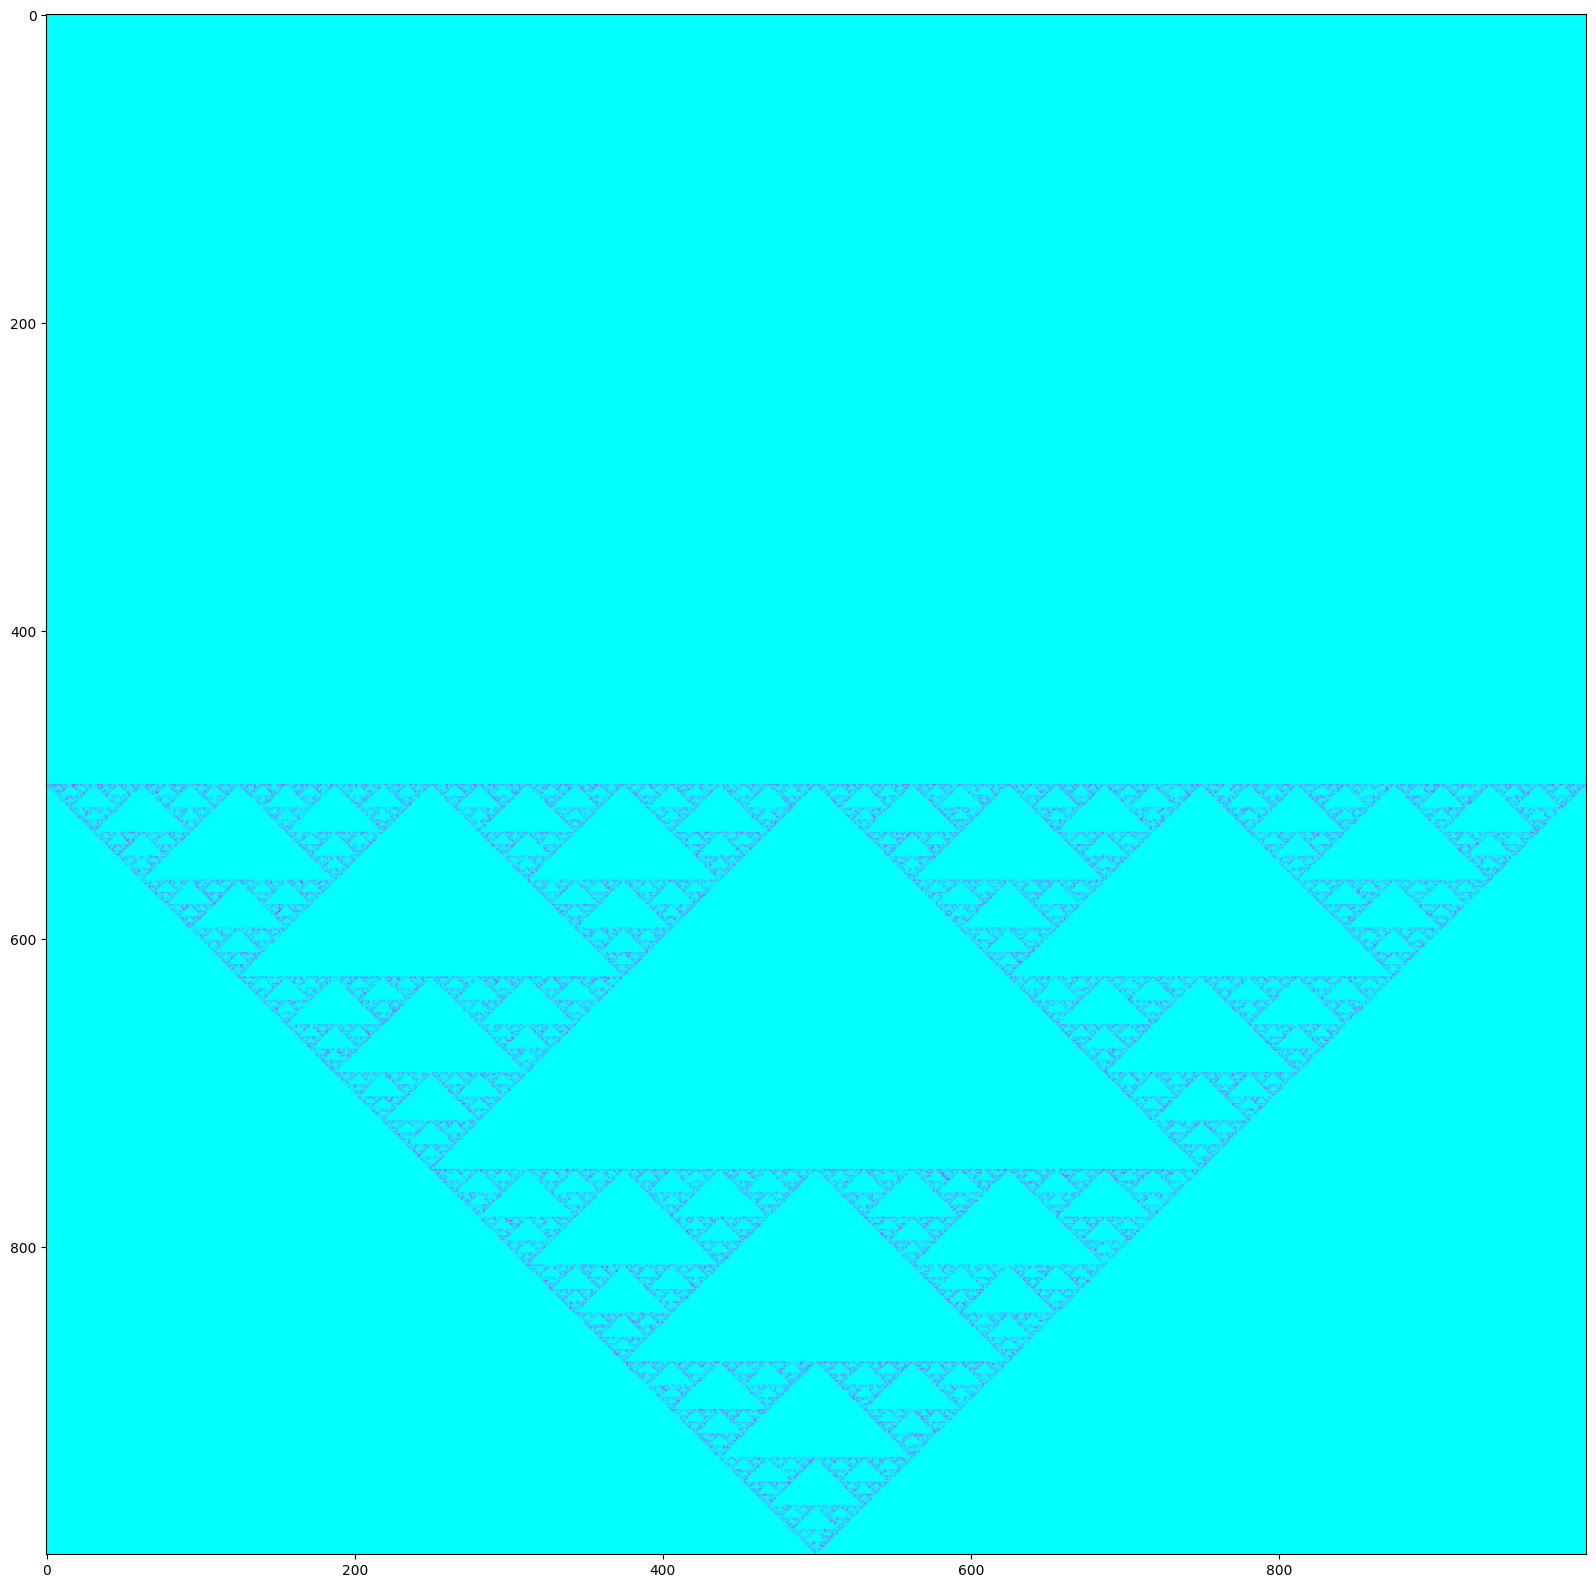

In [56]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
P = np.zeros([1000, 1000])
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter>9:
        P[int((z.imag*500)+500), int((z.real*500)+500)]+=1

  
plt.figure(figsize=(20, 20))
plt.imshow(P, cmap='cool', vmax=10)


**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.


Это треугольник Серпинского, он строится по следующему алгоритму: 
Нам изначально заданы 3 координаты (0; 1), (1; 0), (-1; 0), которые делят проостранство на 3 условные части, в которых далее применяется функция для произвольной точки t. Далее мы генерируем произвольное число в отрезке $n_{funk}\in (0; 1)$, оно попадает в окрестность одной из точек, тогда мы строим точку, лежащую на середине вектора из точки-аттрактора (на первой итерации это t) в новую сгенерированную точку. Дальше применяем описанный алгоритм для построенной точки. В нашем случае мы повторяем его 1000 раз.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

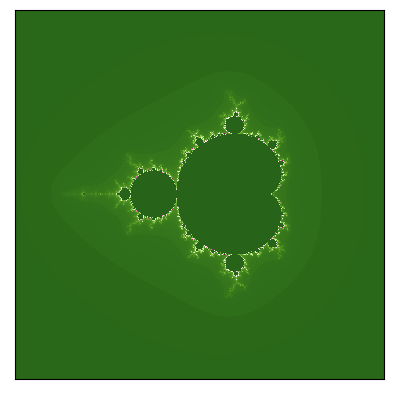

In [73]:
#mandelbrot set
pmin, pmax, qmin, qmax = -2.5, 1.5, -2, 2
ppoints, qpoints = 200, 200
max_iterations = 100
infinity_border = 10
def mandelbrot(pmin, pmax, ppoints, qmin, qmax, qpoints,
               max_iterations=200, infinity_border=10):
    image = np.zeros((ppoints, qpoints))
    p, q = np.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z**2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T
image = mandelbrot(-2.5, 1.5, 1000, -2, 2, 1000)
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='PiYG', interpolation='none')
plt.show()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

11.5 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
21.8 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
46.7 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
75.4 µs ± 3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
112 µs ± 4.92 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
281 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
403 µs ± 29 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.08 ms ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.6 ms ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.69 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.1 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
42 ms ± 599 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


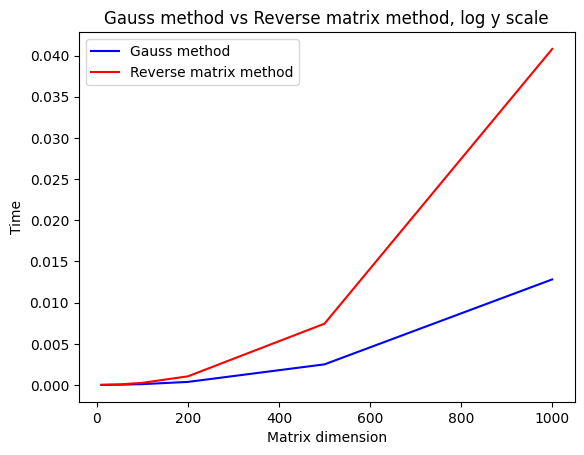

In [3]:
#Gauss
def solve(A, B):
    return np.linalg.solve(A, B)

#with reverse matrix
def matrix_eq(A, B):
    R = sla.inv(A)
    return R@B

 #tests1  
lib_times = []
my_times = []
dimensions = [10,50, 100,200,500, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, 10)
    res_lib = %timeit -o solve(A,B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o matrix_eq(A,B)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Gauss method')
plt.plot(dimensions, my_times, color='red', label='Reverse matrix method')
plt.title('Gauss method vs Reverse matrix method, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()


108 µs ± 4.89 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
321 µs ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
154 µs ± 4.22 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
364 µs ± 5.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
381 µs ± 8.83 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
503 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
678 µs ± 7.23 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
709 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.59 ms ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.25 ms ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.72 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.58 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.36 ms ± 290 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.82 ms ± 152 µs per loop (mean ± std. dev. of 7 runs

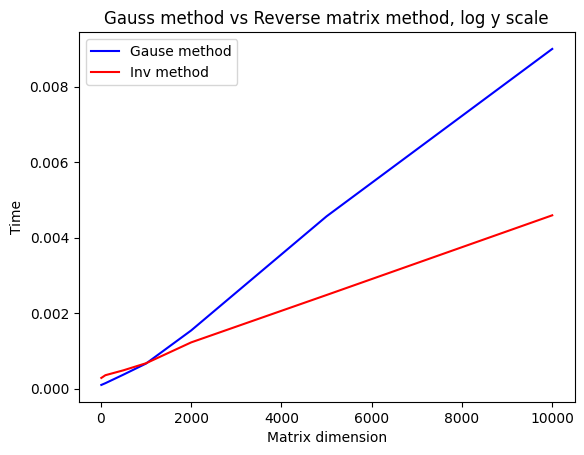

In [4]:
#test2
lib_times = []
my_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
for dim in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, dim)
    res_lib = %timeit -o solve(A,B)
    lib_times.append(res_lib.best)
    res_my = %timeit -o matrix_eq(A,B)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Gause method')
plt.plot(dimensions, my_times, color='red', label='Inv method')
plt.title('Gauss method vs Reverse matrix method, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Метод Гаусса требует $n^2$ операций для приведения к улучшенному ступенчатому виду (операции деления), а для приведения от треугольного вида у улучшенному ступенчатому виду (элементарные преобразования вида "сложение одной строки, умноженной на скаляр, с данной сторокой) необходимо $n^2(m-1)+n^3 - mn$.

Метод решения через обратную матрицу: 
1) $2n^3+n^2(m-1)-2n + 2n^3- n(m+2) +n^2(m-1)$ - умножения на скаляр и сложение
2) $n^2$ - делений для приведения к УСВ

Что быстрее?
Если количество столбцов в матрице B значительно превосходит количество строк, то умножение на обратную матрицу оказывается значительно быстрее метода Гаусса, что происходит потому что для обратной матрицы необхдимо провести операции над m столбцами, а в методе Гаусса - над $n+m$ столбцами. В других случаях метод Гаусса работает быстрее, так как умножение матриц требует расчета обратной мамтрицы (операция транспонирования и умножения на скаляр - $2n^2$ операций) и умножения двух матриц ($mn$ операций), а в методе Гаусса требуется выполнение элементраных преобразований.

Из оценки сложности можно заключить, что метод Гаусса работает в большинстве случаев быстрее, но метод умножения в некоторых случаях может работать быстрее, когда нам становится неважно количество столбцов в матрице B. 